Data loaded successfully!
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeInde

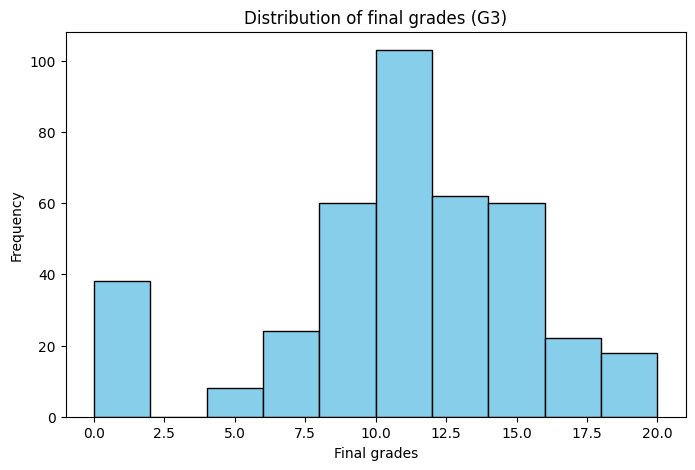

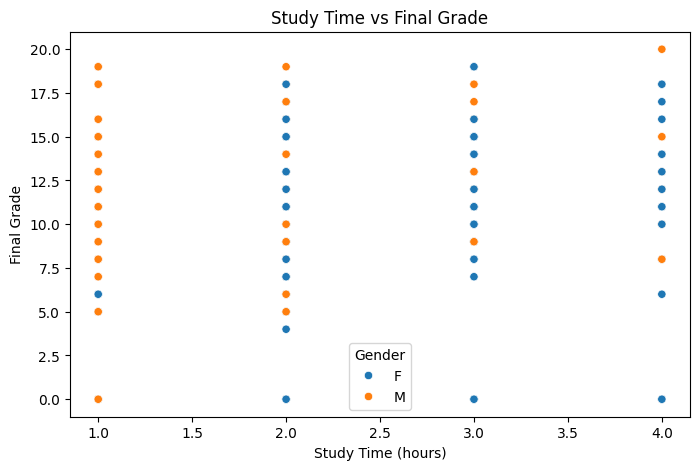

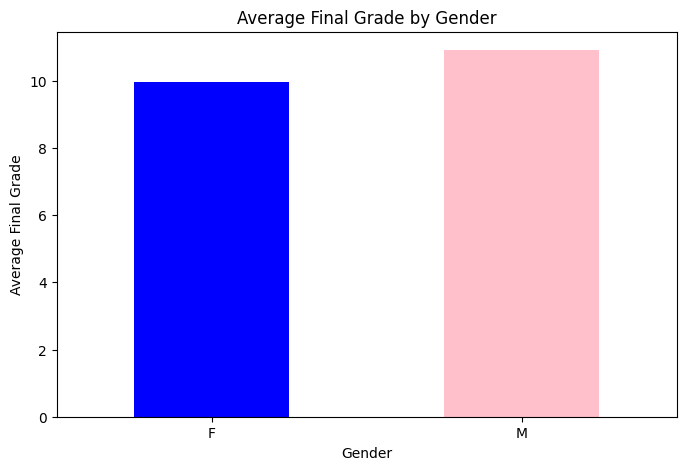

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import zipfile

# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
dataset_path = "student-mat.csv"

# Download the dataset
urllib.request.urlretrieve(url, "student.zip")

# Extract the dataset
with zipfile.ZipFile("student.zip", "r") as zip_ref:
    zip_ref.extractall(".")

# Load the data into a DataFrame
data = pd.read_csv(dataset_path, sep=";")
print("Data loaded successfully!")

# Step 2: Data Exploration
# Display the first few rows
print(data.head())
print("\nDataset Info:")
data.info()

# Step 3: Data Cleaning
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Remove duplicates
data = data.drop_duplicates()

# Step 4: Data Analysis
# Question 1: What is the average score in algebra (G3)?
average_score = data['G3'].mean()
print(f"\nAverage algebra score (G3): {average_score:.2f}")

# Question 2: How many students scored above 15 in their final grade (G3)?
students_above_15 =len(data[data['G3'] > 15])
print(f"Number of students scoring above 15:{students_above_15}")

#Question 3:Is there a coorelation between study time and final grade?
correlation = data['studytime'].corr(data['G3'])
print(f"Correlation between study time and final grade :{correlation:.2f}")

#Question 4:Whuch gender has a higher average final grade?
average_grade_by_gender =data.groupby('sex')['G3'].mean()
print("\nAverage Final Grade by Gender:")
print(average_grade_by_gender)

#Step5: Data Visualization
#Histogram of final grades
plt.figure(figsize=(8,5))
plt.hist(data['G3'],bins=10,color='skyblue',edgecolor='black')
plt.title("Distribution of final grades (G3)")
plt.xlabel("Final grades")
plt.ylabel("Frequency")
plt.show()

#Scatter plot of study time vs. final grade
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='studytime', y='G3' , hue='sex')
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time (hours)")
plt.ylabel("Final Grade")
plt.legend(title="Gender")
plt.show()

#Bar chart of average scores by gender
plt.figure(figsize=(8,5))
average_grade_by_gender.plot(kind='bar',color=['blue','pink'])
plt.title("Average Final Grade by Gender")
plt.ylabel("Average Final Grade")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()

